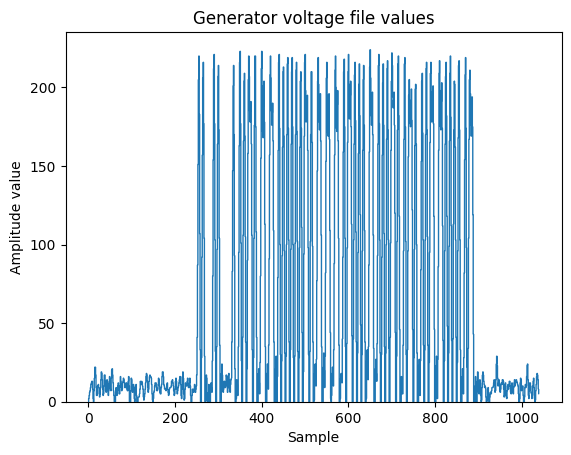

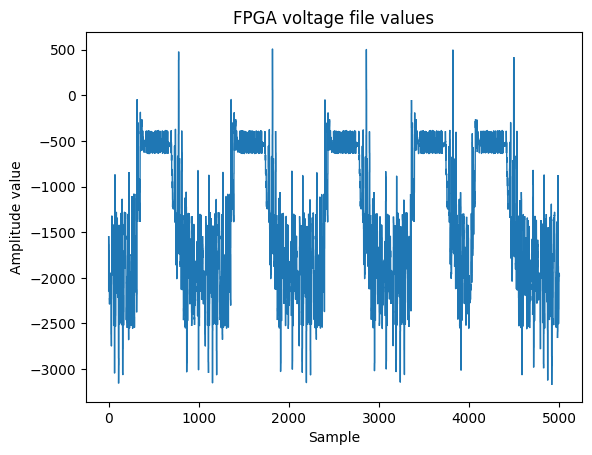

In [1]:
%matplotlib widget

import os
import numpy as np
import matplotlib.pyplot as plt

def parse_file_into_array(file_path: str) -> np.ndarray:
    with open(file_path, 'r') as file:
        lines = file.readlines()
    data = [int(line.strip()) for line in lines]
    np_array = np.array(data)
    return np_array

def find_file_by_name(folder_path: str, file_start: str) -> str:
    file_name = next((f for f in os.listdir(folder_path)
                        if os.path.isfile(os.path.join(folder_path, f)) and f.startswith(file_start)
                        ), None)

    if file_name:
        full_file_path = os.path.join(folder_path, file_name)
        return full_file_path
    else:
        return ""

#Open function generator file
file_path = 'test_signals_generated\\testVoltageGenerator.txt'
generator_voltage_values = parse_file_into_array(file_path)

#Open received data from FPGA
fpga_data_file_path = find_file_by_name("test_signals_generated", "Received_data")
fpga_voltage_values = parse_file_into_array(fpga_data_file_path)

plt.stairs(generator_voltage_values, label="Generator voltage values", baseline=None)
plt.xlabel('Sample')
plt.ylabel('Amplitude value')
plt.title("Generator voltage file values")
plt.show()

plt.stairs(fpga_voltage_values, label="FPGA voltage values", baseline=None)
plt.xlabel('Sample')
plt.ylabel('Amplitude value')
plt.title("FPGA voltage file values")
plt.show()